In [4]:
import os
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from collections import defaultdict

In [5]:
def load_and_preprocess_images(folder_path, resize_to=(64, 64)):
    images = []
    filenames = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            try:
                img = Image.open(os.path.join(folder_path, filename)).convert('RGB')
                img = img.resize(resize_to)
                img_array = np.array(img).flatten() / 255.0  # Aplanar y normalizar
                images.append(img_array)
                filenames.append(filename)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return np.array(images), filenames

In [6]:
folder_path = r"C:\Users\Felix\Downloads\all_images"  # Cambia esta ruta según tu carpeta
X, filenames = load_and_preprocess_images(folder_path)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled = X_scaled.astype('float32')

For k=2, Silhouette Score: 0.18
For k=3, Silhouette Score: 0.09
For k=4, Silhouette Score: 0.08
For k=5, Silhouette Score: 0.06
For k=6, Silhouette Score: 0.05
For k=7, Silhouette Score: 0.04
For k=8, Silhouette Score: 0.05
For k=9, Silhouette Score: 0.04
For k=10, Silhouette Score: 0.04


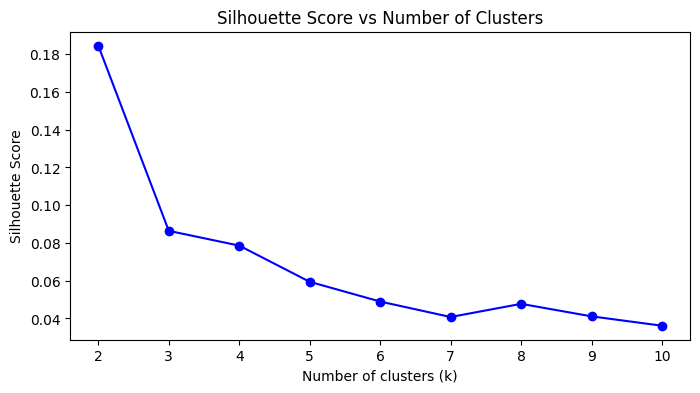

In [9]:
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, y_pred)
    silhouette_scores.append(score)
    print(f"For k={k}, Silhouette Score: {score:.2f}")

plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [10]:
k = 3  # Ajusta este valor según el gráfico de silueta
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

In [11]:
from sklearn.decomposition import PCA


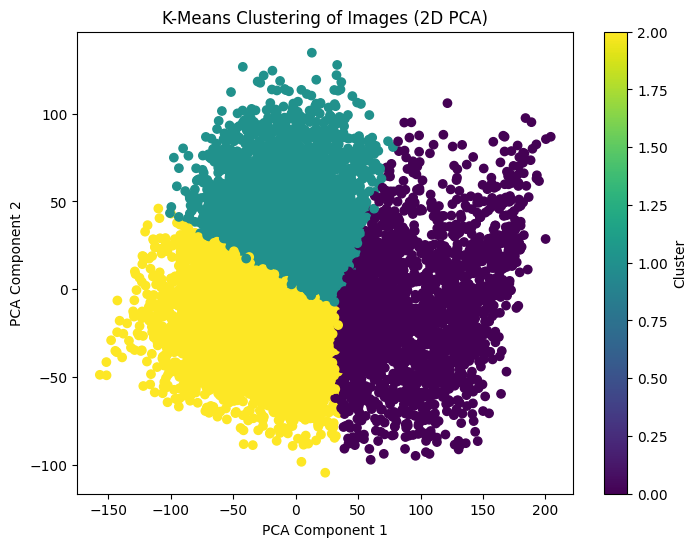

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('K-Means Clustering of Images (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

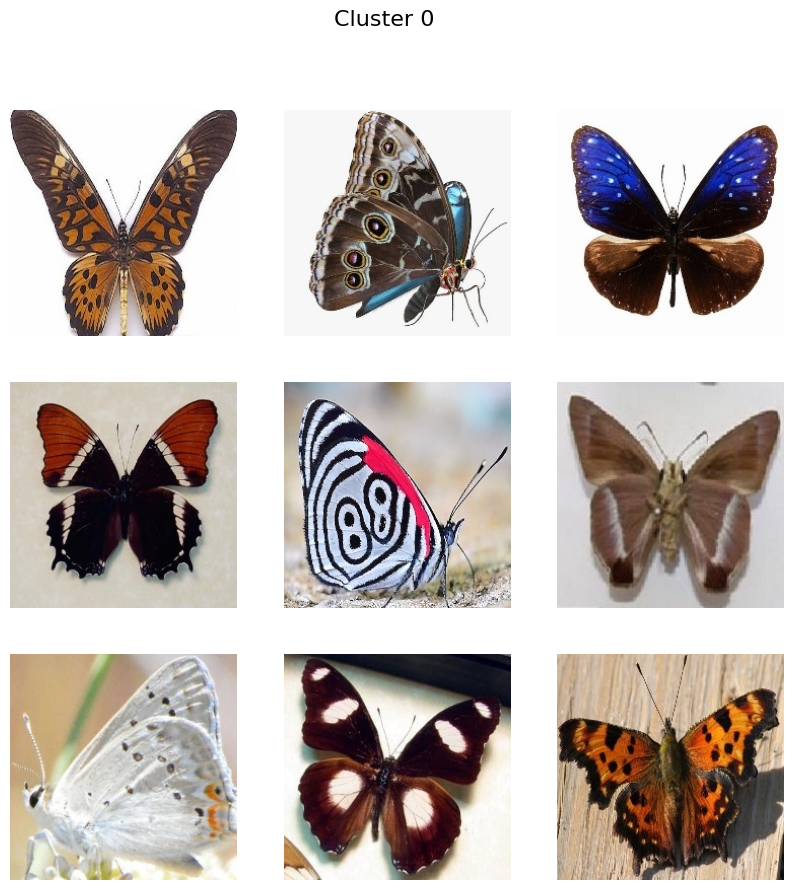

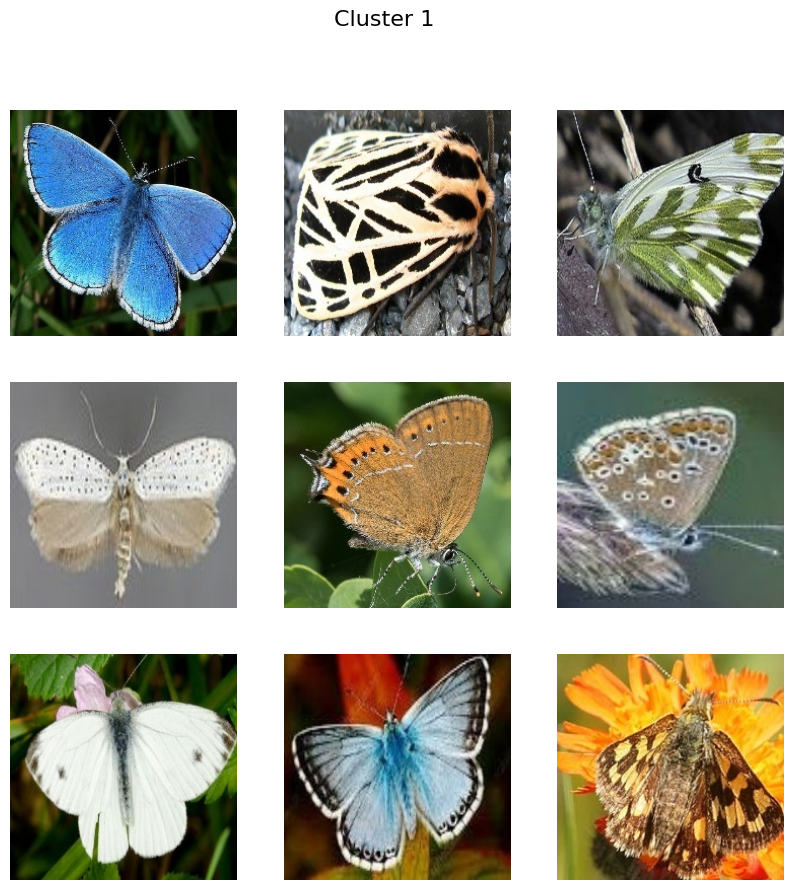

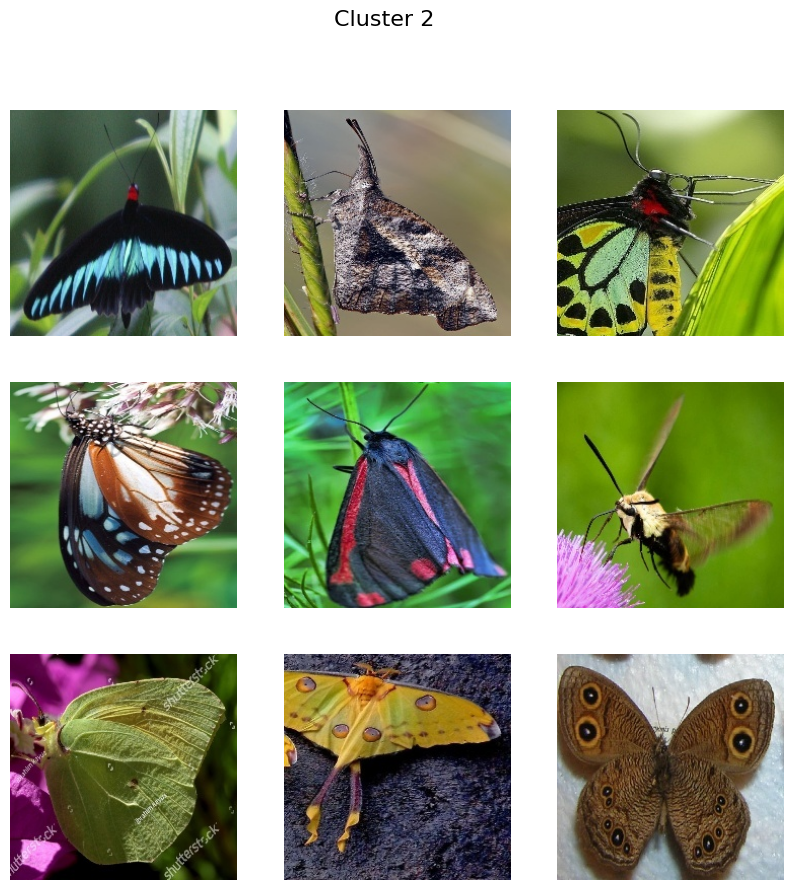

In [13]:
clusters = defaultdict(list)
for filename, cluster in zip(filenames, y_pred):
    clusters[cluster].append(filename)

num_examples = 9
for cluster in range(k):
    if len(clusters[cluster]) > 0:
        plt.figure(figsize=(10, 10))
        plt.suptitle(f'Cluster {cluster}', fontsize=16)
        for i, filename in enumerate(clusters[cluster][:num_examples]):
            img = Image.open(os.path.join(folder_path, filename))
            plt.subplot(3, 3, i+1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()
    else:
        print(f"No images in cluster {cluster}")